In [1]:
from realtime_pollen_calibration import utils
from realtime_pollen_calibration import update_strength_realtime
from realtime_pollen_calibration import update_phenology_realtime
import cfgrib
import scipy.interpolate as interp
import numpy as np
import matplotlib.pyplot as plt
import iconarray
import psyplot.project as psy
import numpy.ma as ma

In [2]:
def plot3(array, data, filename = '', **kwargs):
    lonmin = 3.9
    lonmax = 11.3
    latmin = 44.9
    latmax = 49
    pp = psy.plot.mapplot(array,
        name = data,
        projection = 'robin',
        bounds = {'method': 'minmax', 'N':100, 'vmin': np.nanmin(ma.masked_invalid(array[data].values)), 'vmax': np.nanmax(ma.masked_invalid(array[data].values))},
        map_extent = [lonmin, lonmax, latmin, latmax],
        lakes = True, 
        borders = True, 
        rivers = True,
        xgrid = False, ygrid = False, levels = 50, 
        cticks=np.linspace(np.nanmin(ma.masked_invalid(array[data].values)), 
                           np.nanmax(ma.masked_invalid(array[data].values)), 6), cmap='RdBu_r', **kwargs)

    fig = plt.gcf()
    fig.axes[0].text(-0.05, -0.1, 'Min: %.2f'%(np.nanmin(array[data].values)), transform=fig.axes[0].transAxes)
    fig.axes[0].text(0.25, -0.1, 'Avg: %.2f'%(np.nanmean(array[data].values)), transform=fig.axes[0].transAxes)
    fig.axes[0].text(0.65, -0.1, 'Mdn: %.2f'%(np.median(array[data].values)), transform=fig.axes[0].transAxes)
    fig.axes[0].text(0.88, -0.1, 'Max: %.2f'%(np.nanmax(array[data].values)), transform=fig.axes[0].transAxes)
    if len(filename) > 0:
        output_file = '/store/s83/gvanpary/Figures/' + filename
        plt.savefig(output_file)

In [3]:
# LOAD DATA


# COSMO OUTPUT
# 7AM_A
file_grib = '/store/s83/gvanpary/COSMO_data/sim1_67AM/lfsf00010000'
ds = cfgrib.open_dataset(
            file_grib,
            encode_cf=("time", "geography", "vertical")
        )
# 8AM_B
file_grib = '/store/s83/gvanpary/COSMO_data/sim1_78AM/lfsf00010000'
ds2 = cfgrib.open_dataset(
            file_grib,
            encode_cf=("time", "geography", "vertical")
        )

ds['diffr'] = ds.ALNUtune.copy(deep=True)
ds.diffr.values = ds2.ALNUtune - ds.ALNUtune

file_grib = '/scratch/gvanpary/pollen/data/grib2_files_cosmo1e/laf2022022207_ALNUtune'
dss1 = cfgrib.open_dataset(
            file_grib,
            encode_cf=("time", "geography", "vertical")
        )

file_grib = '/scratch/gvanpary/pollen/data/grib2_files_cosmo1e/laf2022022208_ALNUtune'
dss2 = cfgrib.open_dataset(
            file_grib,
            encode_cf=("time", "geography", "vertical")
        )

file_grib = '/scratch/gvanpary/pollen/data/output/2022022208_ALNUtune'
dspy = cfgrib.open_dataset(
            file_grib,
            encode_cf=("time", "geography", "vertical")
        )

file_grib = '/scratch/gvanpary/pollen/data/output/COSMO_2022022208_ALNUtune'
dspy2 = cfgrib.open_dataset(
            file_grib,
            encode_cf=("time", "geography", "vertical")
        )

dss1['diffr'] = dss1.ALNUtune.copy(deep=True)
dss1.diffr.values = dss2.ALNUtune.values - dss1.ALNUtune.values

dss1['diffpy'] = dss1.ALNUtune.copy(deep=True)
dss1.diffpy.values = dspy.ALNUtune.values - dss1.ALNUtune.values

ds['diffpy'] = ds.ALNUtune.copy(deep=True)
ds.diffpy.values = dspy2.ALNUtune.values - ds.ALNUtune.values

ERROR:cfgrib.dataset:skipping variable: paramId==500028 shortName='U'
Traceback (most recent call last):
  File "/scratch/gvanpary/miniconda3/envs/pollen/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/scratch/gvanpary/miniconda3/envs/pollen/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='latitude' value=Variable(dimensions=('y', 'x'), data=array([[44.995492, 44.996188, 44.99688 , ..., 45.124776, 45.12464 ,
        45.1245  ],
       [45.005468, 45.006164, 45.006856, ..., 45.134776, 45.13464 ,
        45.1345  ],
       [45.015444, 45.01614 , 45.016832, ..., 45.144776, 45.144636,
        45.144496],
       ...,
       [49.314104, 49.31486 , 49.315612, ..., 49.454336, 49.454184,
        49.454032],
       [49.324076, 49.324832, 49.325584, ..., 49.464332, 49.464184,
        

ERROR:cfgrib.dataset:skipping variable: paramId==500030 shortName='V'
Traceback (most recent call last):
  File "/scratch/gvanpary/miniconda3/envs/pollen/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/scratch/gvanpary/miniconda3/envs/pollen/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='latitude' value=Variable(dimensions=('y', 'x'), data=array([[44.995492, 44.996188, 44.99688 , ..., 45.124776, 45.12464 ,
        45.1245  ],
       [45.005468, 45.006164, 45.006856, ..., 45.134776, 45.13464 ,
        45.1345  ],
       [45.015444, 45.01614 , 45.016832, ..., 45.144776, 45.144636,
        45.144496],
       ...,
       [49.314104, 49.31486 , 49.315612, ..., 49.454336, 49.454184,
        49.454032],
       [49.324076, 49.324832, 49.325584, ..., 49.464332, 49.464184,
        

ERROR:cfgrib.dataset:skipping variable: paramId==500088 shortName='AUMFL_S'
Traceback (most recent call last):
  File "/scratch/gvanpary/miniconda3/envs/pollen/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/scratch/gvanpary/miniconda3/envs/pollen/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='latitude' value=Variable(dimensions=('y', 'x'), data=array([[44.995492, 44.996188, 44.99688 , ..., 45.124776, 45.12464 ,
        45.1245  ],
       [45.005468, 45.006164, 45.006856, ..., 45.134776, 45.13464 ,
        45.1345  ],
       [45.015444, 45.01614 , 45.016832, ..., 45.144776, 45.144636,
        45.144496],
       ...,
       [49.314104, 49.31486 , 49.315612, ..., 49.454336, 49.454184,
        49.454032],
       [49.324076, 49.324832, 49.325584, ..., 49.464332, 49.464184,
  

In [ ]:
print(f'Time of first dataset {ds.time.values + ds.step.values}')
print(f'Time of second dataset {ds2.time.values + ds2.step.values}')

/scratch/gvanpary/miniconda3/envs/pollen/lib/python3.9/site-packages/psy_simple/plugin.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if b is None or b == 'none':
/scratch/gvanpary/miniconda3/envs/pollen/lib/python3.9/site-packages/psy_simple/plugin.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if b is None or b == 'none':
/scratch/gvanpary/miniconda3/envs/pollen/lib/python3.9/site-packages/psy_simple/plugin.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if b is None or b == 'none':
/scratch/gvanpary/miniconda3/envs/pollen/lib/python3.9/site-packages/psy_simple/plugin.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if b is None or b == 

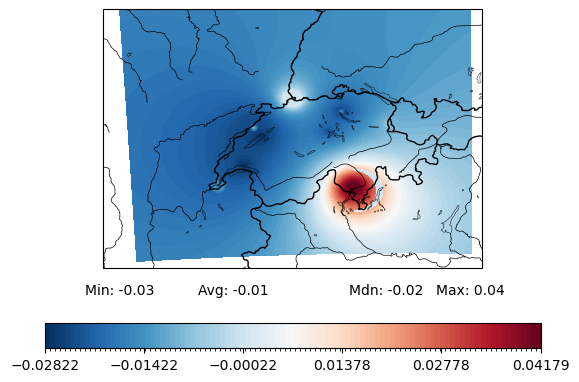

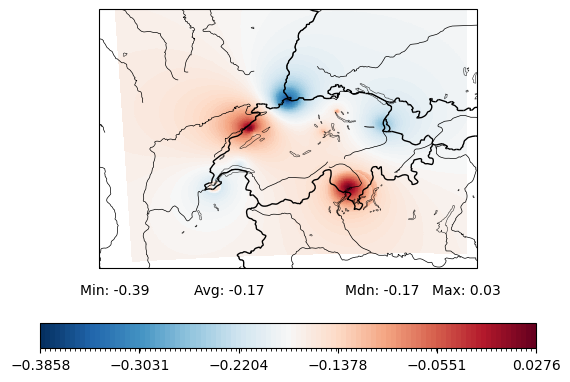

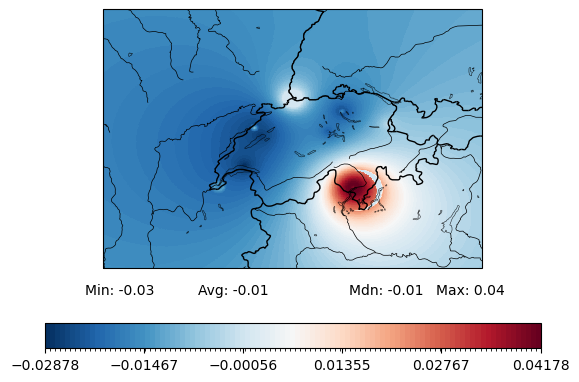

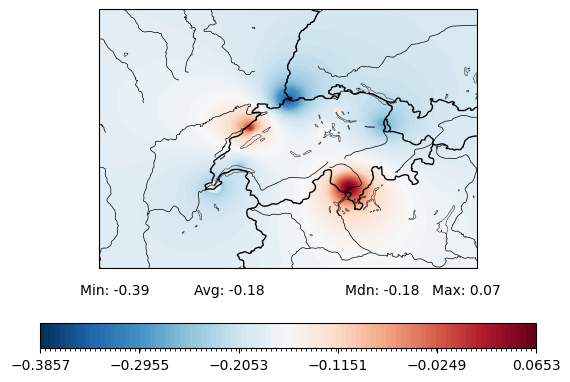

In [6]:
plot3(ds, 'diffr', filename='COSMO_diff_tp1_t')
plot3(ds, 'diffpy', filename='COSMO_Py_diff')
plot3(dss1, 'diffr', filename='SIMON_diff')
plot3(dss1, 'diffpy', filename='SIMON_Py_diff')

In [4]:
# COSMO OUTPUT
# 7AM_A
file_grib = '/scratch/gvanpary/wd/22022206_325/lm_fine_emermet/lfsf00010000'
data_sim2_1 = cfgrib.open_dataset(
            file_grib,
            encode_cf=("time", "geography", "vertical")
        )
# 8AM_B
file_grib = '/scratch/gvanpary/wd/22022208_325/lm_fine_emermet/lfsf00000000'
data_sim2_2 = cfgrib.open_dataset(
            file_grib,
            encode_cf=("time", "geography", "vertical")
        )

print(f'Time of first dataset {data_sim2_1.time.values + data_sim2_1.step.values}')
print(f'Time of second dataset {data_sim2_2.time.values + data_sim2_2.step.values}')

data_sim2_1['diffr'] = data_sim2_1.ALNUtune.copy(deep=True)
data_sim2_1.diffr.values = data_sim2_2.ALNUtune.values - data_sim2_1.ALNUtune.values

Time of first dataset 2022-02-22T07:00:00.000000000
Time of second dataset 2022-02-22T08:00:00.000000000


/scratch/gvanpary/miniconda3/envs/pollen/lib/python3.9/site-packages/psy_simple/plugin.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if b is None or b == 'none':
/scratch/gvanpary/miniconda3/envs/pollen/lib/python3.9/site-packages/psy_simple/plugin.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if b is None or b == 'none':
/scratch/gvanpary/miniconda3/envs/pollen/lib/python3.9/site-packages/psy_simple/plugin.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if b is None or b == 'none':


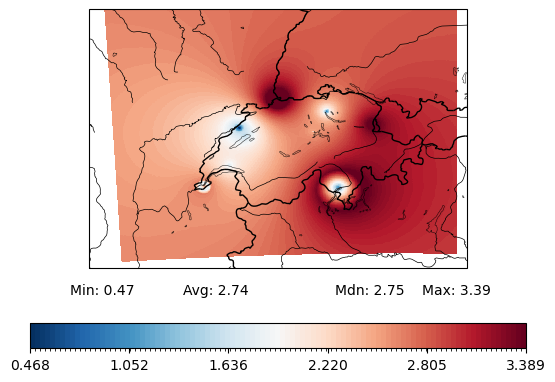

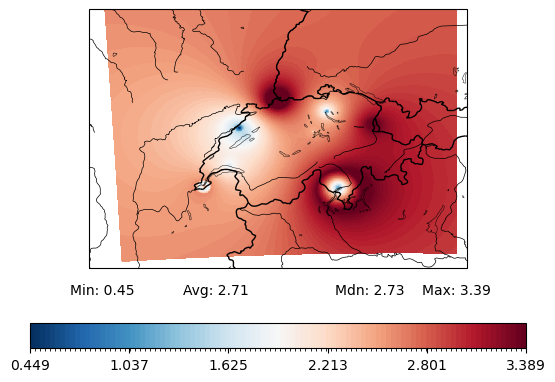

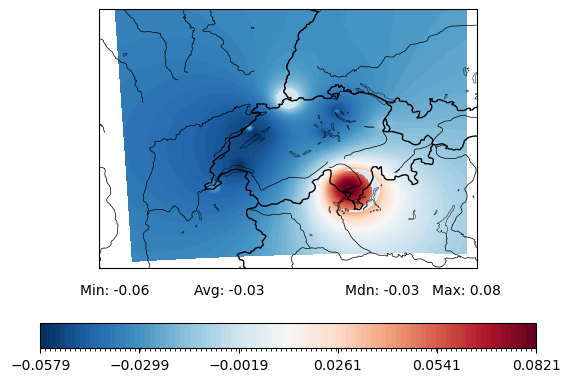

In [5]:
plot3(data_sim2_1, 'ALNUtune')
plot3(data_sim2_2, 'ALNUtune')
plot3(data_sim2_1, 'diffr')

In [ ]:
coord_stns = [
    [46.173, 8.787],
    [47.562, 7.584],
    [47.173, 9.473],
    [46.525, 6.643],
    [47.058, 8.297],
    [47.001, 6.95],
    [47.378, 8.566],
    [46.192, 6.149],
    [47.113, 6.832]
]
for cstn in coord_stns:
    print(utils.get_field_at(data_sim2_1, 'ALNUtune', cstn).values[0][0])
    
tune_GRIB = np.array([utils.get_field_at(data_sim2_1, 'ALNUtune', cstn).values[0][0] for cstn in coord_stns])

In [ ]:
tune_COSMO=np.array([0.9642892, 3.388972, 3.388422, 1.817622, 2.104670, 1.522273, 0.8724313, 2.607844, 0.4771066])

In [ ]:
tune_GRIB-tune_COSMO